In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

In [130]:
control = pd.read_csv('control_group.csv', delimiter=';')
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
test = pd.read_csv('test_group.csv', delimiter=';')
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


## Vorverarbeitung von Daten

In [132]:
print('control')
display(control.head())
control.info()
print('______________________________________________________________________')
print('test')
display(test.head())
test.info()

control


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
______________________________________________________________________
test


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [133]:
# Entfernen der Daten vom 05.08.2019, da wichtige Kennzahlen fehlen, die für den Test entscheidend sind.
control = control.drop(index=4)

In [142]:
# Datentypen konvertieren
control['Date'] = control['Date'].astype('datetime64[ns]')
control['# of Purchase'] = control['# of Purchase'].astype('int64')
control['# of Impressions'] = control['# of Impressions'].astype('int64')
control['Reach'] = control['Reach'].astype('int64')
control['# of Website Clicks'] = control['# of Website Clicks'].astype('int64')
control['# of Searches'] = control['# of Searches'].astype('int64')
control['# of View Content'] = control['# of View Content'].astype('int64')
control['# of Add to Cart'] = control['# of Add to Cart'].astype('int64')
test['Date'] = test['Date'].astype('datetime64[ns]')

In [143]:
# Zusammenführen der Test- und Kontroll-Datensätze in einen einzigen
combined = pd.concat([control, test], axis=0)
combined

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-01-08,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-02-08,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-03-08,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-04-08,1940,72878,61235,3065,1042,982,1183,340
5,Control Campaign,2019-06-08,3083,109076,87998,4028,1709,1249,784,764
6,Control Campaign,2019-07-08,2544,142123,127852,2640,1388,1106,1166,499
7,Control Campaign,2019-08-08,1900,90939,65217,7260,3047,2746,930,462
8,Control Campaign,2019-09-08,2813,121332,94896,6198,2487,2179,645,501
9,Control Campaign,2019-10-08,2149,117624,91257,2277,2475,1984,1629,734
10,Control Campaign,2019-11-08,2490,115247,95843,8137,2941,2486,1887,475


## Berechnung der Metriken


Metriken, die berechnet werden können:: CTR (Click-Through Rate), CPC (Cost Per Click), CPM (Cost Per Mille), CVR (Conversion Rate), Cost Per Action (CPA)

In [144]:
combined['CTR'] = combined['# of Website Clicks']/combined['# of Impressions']
combined['CPC'] = combined['Spend [USD]']/combined['# of Website Clicks']
combined['CPM'] = combined['Spend [USD]']/combined['# of Impressions']*1000
combined['CVR'] = combined['# of Purchase']/combined['# of Website Clicks']
combined['CPA'] = combined['Spend [USD]']/combined['# of Purchase']

## Überprüfung der Normalverteilung mittels Q-Q-Diagramm


Spend

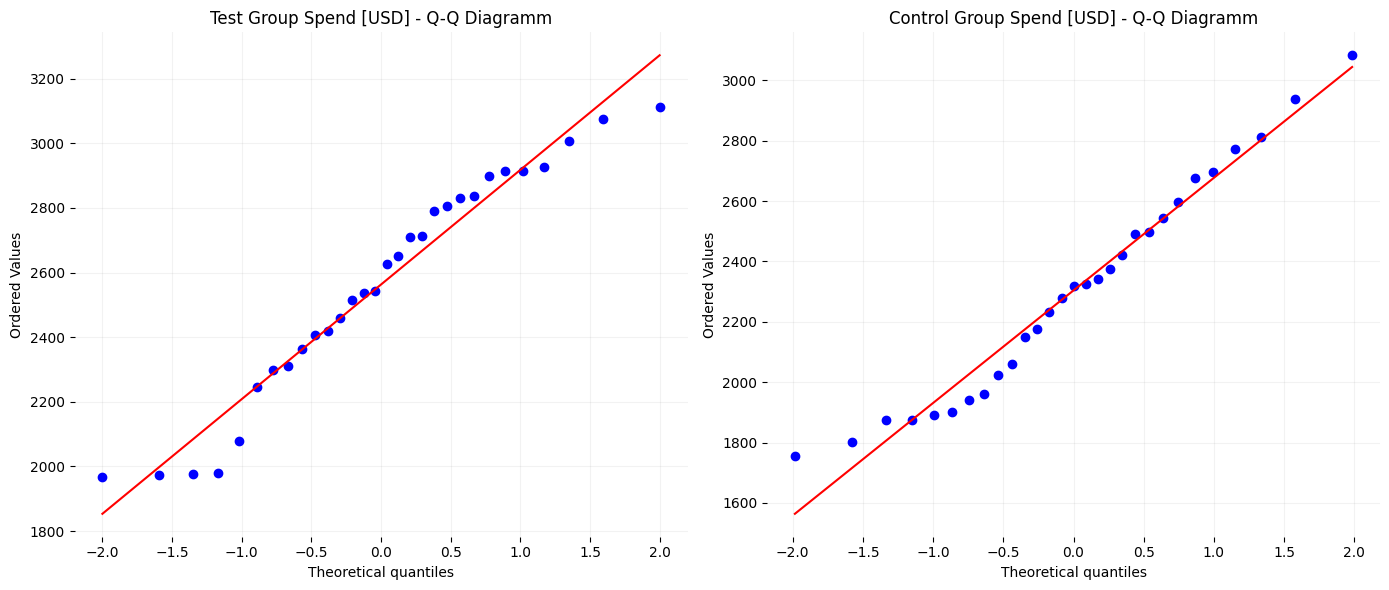

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(test['Spend [USD]'], dist="norm", plot=ax[0])
ax[0].set_title('Test Group Spend [USD] - Q-Q Diagramm')
ax[0].grid(True, axis='both', color='gray', alpha=0.1)

ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

stats.probplot(control['Spend [USD]'], dist="norm", plot=ax[1])
ax[1].set_title('Control Group Spend [USD] - Q-Q Diagramm')
ax[1].grid(True, axis='both', color='gray', alpha=0.1)

ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)


plt.tight_layout()  
plt.show()

Impressions

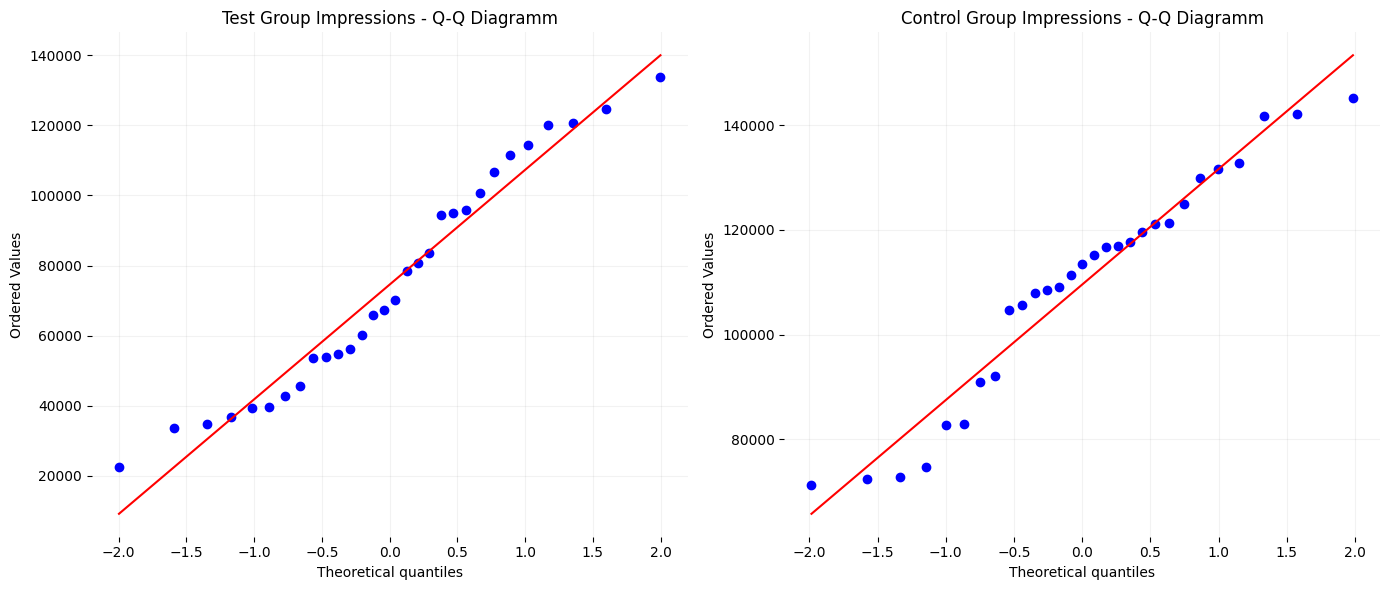

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(test['# of Impressions'], dist="norm", plot=ax[0])
ax[0].set_title('Test Group Impressions - Q-Q Diagramm')
ax[0].grid(True, axis='both', color='gray', alpha=0.1)

ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

stats.probplot(control['# of Impressions'], dist="norm", plot=ax[1])
ax[1].set_title('Control Group Impressions - Q-Q Diagramm')
ax[1].grid(True, axis='both', color='gray', alpha=0.1)

ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)

plt.tight_layout()  
plt.show()

Clicks

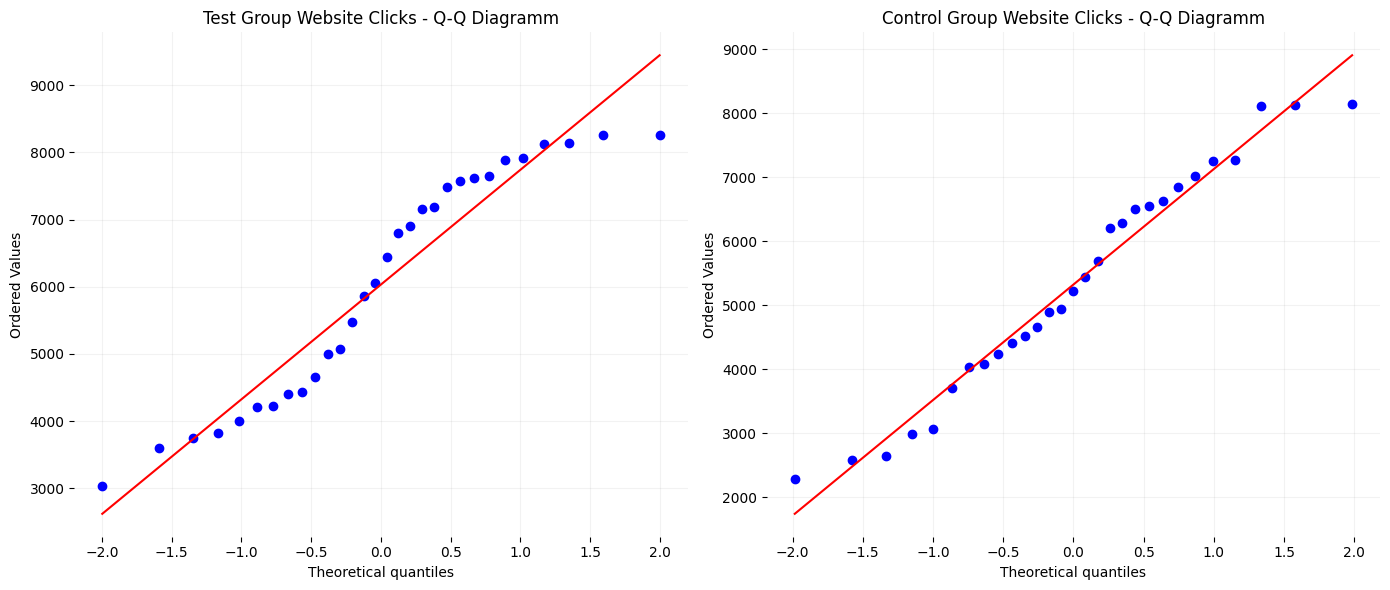

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(test['# of Website Clicks'], dist="norm", plot=ax[0])
ax[0].set_title('Test Group Website Clicks - Q-Q Diagramm')
ax[0].grid(True, axis='both', color='gray', alpha=0.1)

ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

stats.probplot(control['# of Website Clicks'], dist="norm", plot=ax[1])
ax[1].set_title('Control Group Website Clicks - Q-Q Diagramm')
ax[1].grid(True, axis='both', color='gray', alpha=0.1)

ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)

plt.tight_layout() 
plt.show()

Purchase

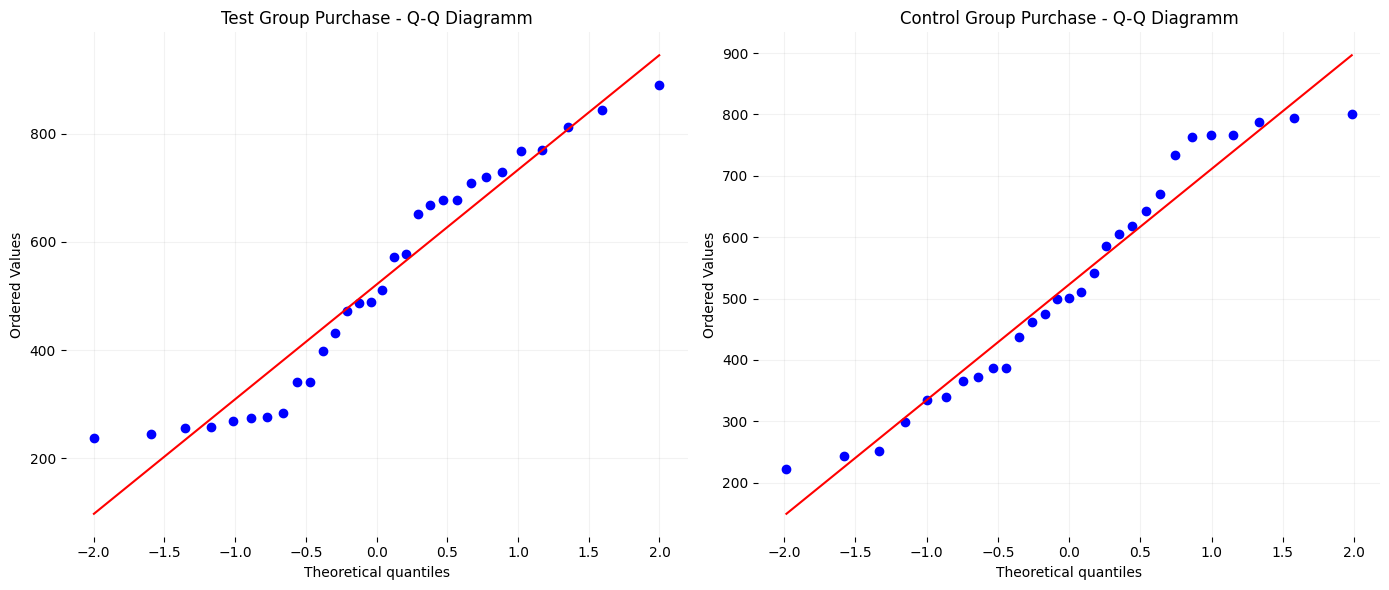

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(test['# of Purchase'], dist="norm", plot=ax[0])
ax[0].set_title('Test Group Purchase - Q-Q Diagramm')
ax[0].grid(True, axis='both', color='gray', alpha=0.1)

ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

stats.probplot(control['# of Purchase'], dist="norm", plot=ax[1])
ax[1].set_title('Control Group Purchase - Q-Q Diagramm')
ax[1].grid(True, axis='both', color='gray', alpha=0.1)

ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)

plt.tight_layout() 
plt.show()

Für alle Metriken, mit denen wir uns befassen, ist das Volumen der Kontroll- und Testgruppen vergleichbar und scheint überwiegend einer Normalverteilung zu folgen.

## Analysis of Results

Visualisierung der Hauptkennzahlen 


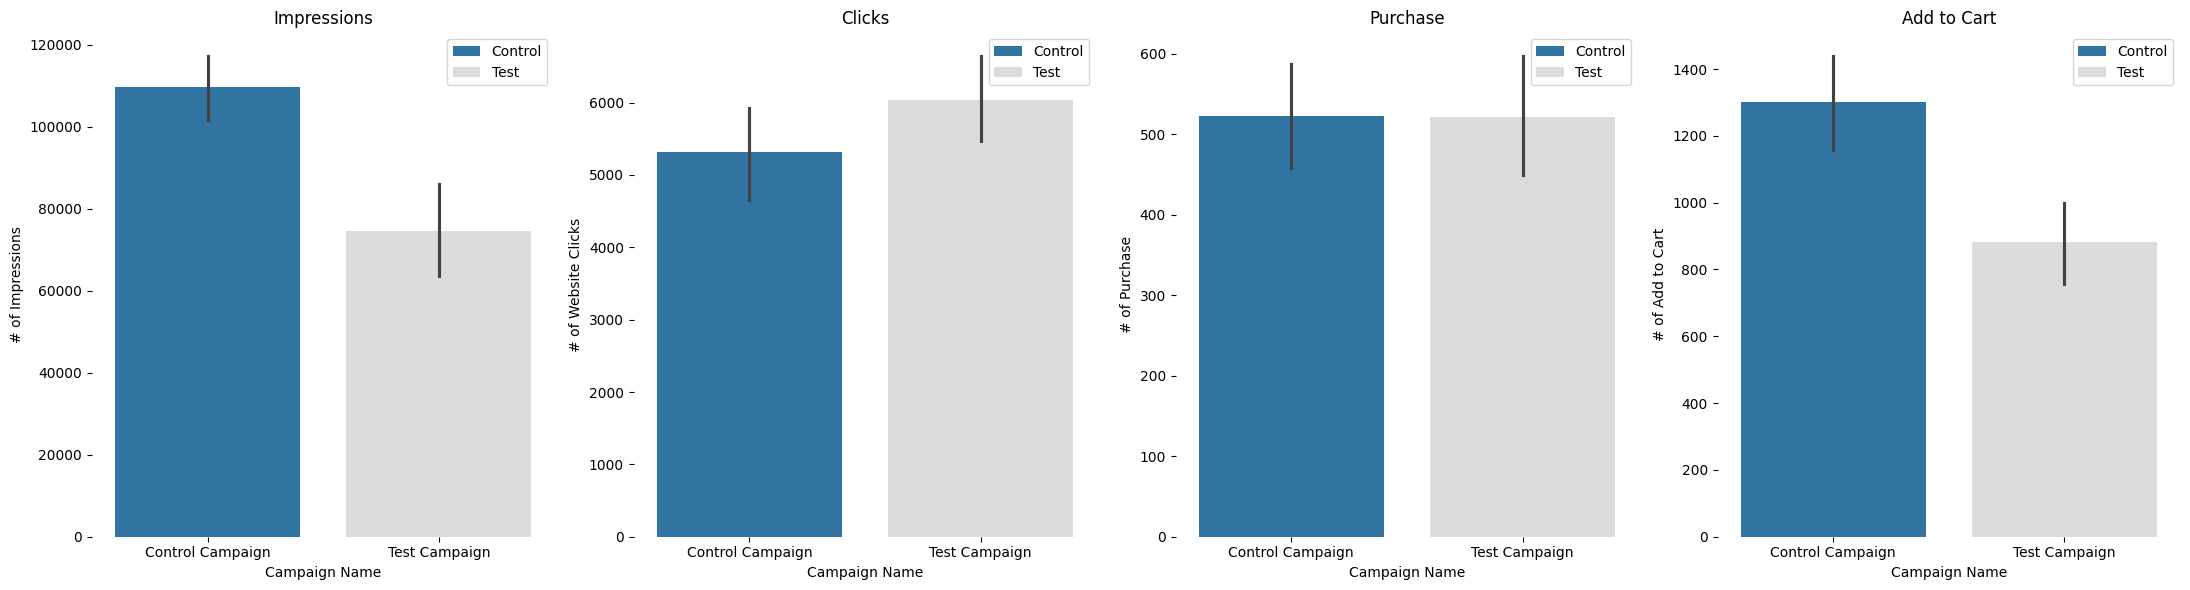

In [172]:
fig, ax = plt.subplots(ncols=4, figsize=(22,6))

sns.barplot(data=control, x='Campaign Name', y='# of Impressions', ax=ax[0], color='tab:blue', label='Control')
sns.barplot(data=test, x='Campaign Name', y='# of Impressions', ax=ax[0], color='gainsboro', label='Test')
ax[0].set_title('Impressions')
ax[0].legend()
ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

sns.barplot(data=control, x='Campaign Name', y='# of Website Clicks', ax=ax[1], color='tab:blue', label='Control')
sns.barplot(data=test, x='Campaign Name', y='# of Website Clicks', ax=ax[1], color='gainsboro', label='Test')
ax[1].set_title('Clicks')
ax[1].legend()
ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)

sns.barplot(data=control, x='Campaign Name', y='# of Purchase', ax=ax[2], color='tab:blue', label='Control')
sns.barplot(data=test, x='Campaign Name', y='# of Purchase', ax=ax[2], color='gainsboro', label='Test')
ax[2].set_title('Purchase')
ax[2].legend()
ax[2].spines['top'].set_visible(False)  
ax[2].spines['right'].set_visible(False)  
ax[2].spines['bottom'].set_visible(False)  
ax[2].spines['left'].set_visible(False)

sns.barplot(data=control, x='Campaign Name', y='# of Add to Cart', ax=ax[3], color='tab:blue', label='Control')
sns.barplot(data=test, x='Campaign Name', y='# of Add to Cart', ax=ax[3], color='gainsboro', label='Test')
ax[3].set_title('Add to Cart')
ax[3].legend()
ax[3].spines['top'].set_visible(False)  
ax[3].spines['right'].set_visible(False)  
ax[3].spines['bottom'].set_visible(False)  
ax[3].spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Visualisierung der berechneten Metriken

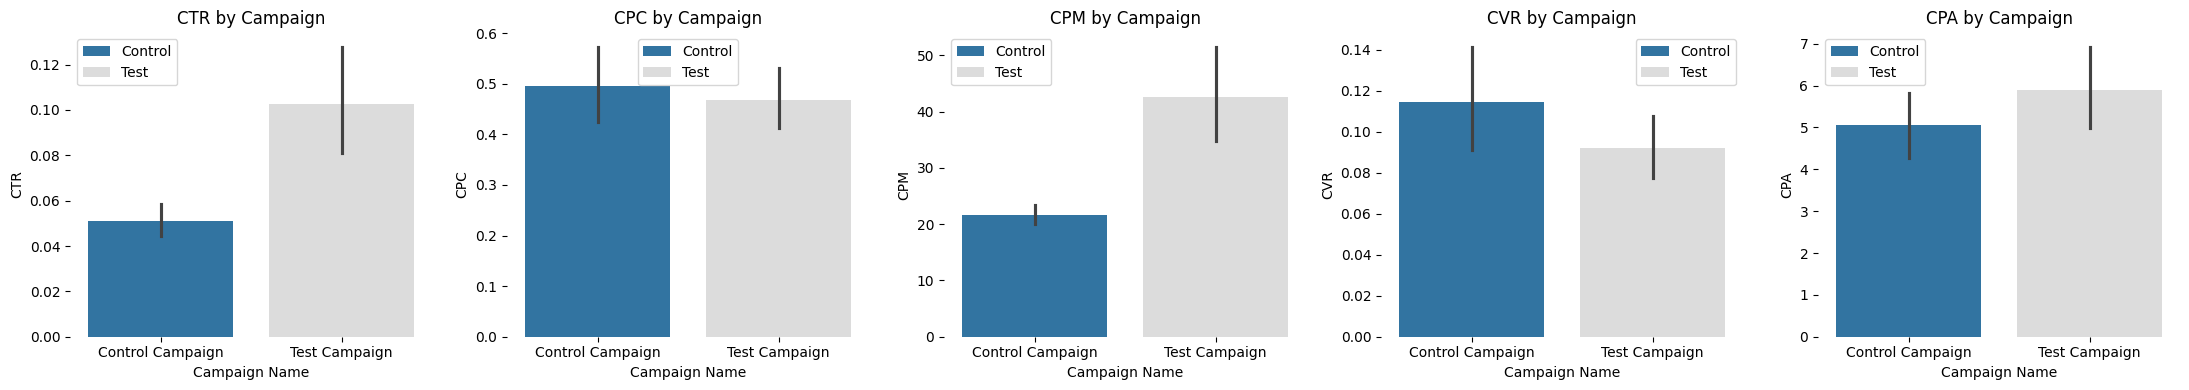

In [175]:
fig, ax = plt.subplots(ncols=5, figsize=(22,4))

sns.barplot(data=combined[combined['Campaign Name'] == 'Control Campaign'], 
            x='Campaign Name', y='CTR', ax=ax[0], color='tab:blue', label='Control')
sns.barplot(data=combined[combined['Campaign Name'] == 'Test Campaign'], 
            x='Campaign Name', y='CTR', ax=ax[0], color='gainsboro', label='Test')
ax[0].set_title('CTR by Campaign')
ax[0].legend()
ax[0].spines['top'].set_visible(False)  
ax[0].spines['right'].set_visible(False)  
ax[0].spines['bottom'].set_visible(False)  
ax[0].spines['left'].set_visible(False)

sns.barplot(data=combined[combined['Campaign Name'] == 'Control Campaign'], 
            x='Campaign Name', y='CPC', ax=ax[1], color='tab:blue', label='Control')
sns.barplot(data=combined[combined['Campaign Name'] == 'Test Campaign'], 
            x='Campaign Name', y='CPC', ax=ax[1], color='gainsboro', label='Test')
ax[1].set_title('CPC by Campaign')
ax[1].legend()
ax[1].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False)  
ax[1].spines['bottom'].set_visible(False)  
ax[1].spines['left'].set_visible(False)

sns.barplot(data=combined[combined['Campaign Name'] == 'Control Campaign'], 
            x='Campaign Name', y='CPM', ax=ax[2], color='tab:blue', label='Control')
sns.barplot(data=combined[combined['Campaign Name'] == 'Test Campaign'], 
            x='Campaign Name', y='CPM', ax=ax[2], color='gainsboro', label='Test')
ax[2].set_title('CPM by Campaign')
ax[2].legend()
ax[2].spines['top'].set_visible(False)  
ax[2].spines['right'].set_visible(False)  
ax[2].spines['bottom'].set_visible(False)  
ax[2].spines['left'].set_visible(False)

sns.barplot(data=combined[combined['Campaign Name'] == 'Control Campaign'], 
            x='Campaign Name', y='CVR', ax=ax[3], color='tab:blue', label='Control')
sns.barplot(data=combined[combined['Campaign Name'] == 'Test Campaign'], 
            x='Campaign Name', y='CVR', ax=ax[3], color='gainsboro', label='Test')
ax[3].set_title('CVR by Campaign')
ax[3].legend()
ax[3].spines['top'].set_visible(False)  
ax[3].spines['right'].set_visible(False)  
ax[3].spines['bottom'].set_visible(False)  
ax[3].spines['left'].set_visible(False)

sns.barplot(data=combined[combined['Campaign Name'] == 'Control Campaign'], 
            x='Campaign Name', y='CPA', ax=ax[4], color='tab:blue', label='Control')
sns.barplot(data=combined[combined['Campaign Name'] == 'Test Campaign'], 
            x='Campaign Name', y='CPA', ax=ax[4], color='gainsboro', label='Test')
ax[4].set_title('CPA by Campaign')
ax[4].legend()
ax[4].spines['top'].set_visible(False)  
ax[4].spines['right'].set_visible(False)  
ax[4].spines['bottom'].set_visible(False)  
ax[4].spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Die Testkampagne hat einen deutlich höheren CTR und CPM sowie einen niedrigeren CPC, während die Kontrollgruppe einen höheren CVR und einen niedrigeren CPA aufweist. Um dies zu bewerten und mehr Vertrauen in unsere Ergebnisse zu gewinnen, müssen wir statistische Tests verwenden, um die Streuung in den Daten zu berücksichtigen.


In [151]:
stat, p_value = stats.ttest_ind(combined[combined['Campaign Name'] == 'Control Campaign']['CPA'], combined[combined['Campaign Name'] == 'Test Campaign']['CPA'])
test_type = 'T-test'

In [152]:

metrics = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
           '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase', 'CTR', 'CPC', 'CPM', 'CVR', 'CPA']


# Итеративная проверка каждой метрики
results = []
for metric in metrics:
    stat, p_value = stats.ttest_ind(combined[combined['Campaign Name'] == 'Control Campaign'][metric], 
                                    combined[combined['Campaign Name'] == 'Test Campaign'][metric])
    test_type = 'T-test'
    
    results.append({'Metric': metric, 'Test': test_type, 'Statistic': stat, 'p-value': p_value})

results_df = pd.DataFrame(results)

results_df

,Metric,Test,Statistic,p-value
0,Spend [USD],T-test,-2.793240,0.007093
1,# of Impressions,T-test,4.884544,0.000009
2,Reach,T-test,5.300379,0.000002
3,# of Website Clicks,T-test,-1.576909,0.120351
4,# of Searches,T-test,-1.137334,0.260157
5,# of View Content,T-test,0.476155,0.635784
6,# of Add to Cart,T-test,4.249064,0.000080
7,# of Purchase,T-test,0.030145,0.976057
8,CTR,T-test,-3.921928,0.000238
9,CPC,T-test,0.501487,0.617960


Zusammenfassung der Ergebnisse:

Spend[USD]: t = −2.793, 𝑝 = 0.007. Der 𝑝-Wert ist kleiner als 0.05, daher unterscheiden sich die Werbeausgaben signifikant zwischen der Test- und der Kontrollgruppe.
Impressions: t = 4.885, 𝑝 = 0.000009. Die Anzahl der Impressionen unterscheidet sich signifikant zwischen den Gruppen. Die Testgruppe hat weniger Impressionen erhalten.
Reach: t = 5.300, 𝑝 = 0.000002. Der Reach unterscheidet sich signifikant. Die Testgruppe hat wahrscheinlich mehr Nutzer erreicht.
Website Clicks: t = −1.577, 𝑝 = 0.120. Es gibt keine statistisch signifikanten Unterschiede in der Anzahl der Klicks auf die Website zwischen den Gruppen.
Searches: t = −1.137, 𝑝 = 0.260. Es gibt keine Unterschiede in der Anzahl der Suchanfragen zwischen der Test- und der Kontrollgruppe.
View Content: t = 0.476, 𝑝 = 0.636. Es gibt keine signifikanten Unterschiede in der Anzahl der Content-Ansichten.
Add to Cart: t = 4.249, 𝑝 = 0.00008. Es gibt signifikante Unterschiede im Hinzufügen zum Warenkorb. Die Kontrollgruppe zeigte bessere Ergebnisse.
Purchase: t = 0.030, 𝑝 = 0.976. Es gibt keine signifikanten Unterschiede in der Anzahl der Käufe.
CTR (Click-Through Rate): t = −3.922, 𝑝 = 0.000238. Es gibt signifikante Unterschiede in der CTR. Die Testgruppe erzielte bessere Ergebnisse.
CPC (Cost Per Click): t = 0.501, 𝑝 = 0.618. Die Klickkosten unterscheiden sich nur geringfügig zwischen den Gruppen.
CPM (Cost Per Mille): t = −4.663, 𝑝 = 0.000019. Es gibt signifikante Unterschiede im CPM. Die Testgruppe hat höhere Kosten pro 1000 Impressionen.
CVR (Conversion Rate): t = 1.500, 𝑝 = 0.139. Es gibt keine signifikanten Unterschiede bei der Conversion-Rate zwischen den Gruppen.
CPA (Cost Per Acquisition): t = −1.307, 𝑝 = 0.196. Die Akquisitionskosten unterscheiden sich nicht signifikant.
Schlussfolgerung:

Trotz der signifikanten Unterschiede bei den Zwischenmetriken (Impressionen, Reach, Add to Cart) zeigten die Endmetriken der Effektivität (Käufe, CVR, CPA) keine signifikanten Unterschiede. Dies könnte darauf hinweisen, dass die neuen Bedingungen (Average Bidding) zu Änderungen auf den oberen Ebenen des Funnels führten, jedoch keine Verbesserung des Endergebnisses bewirkten.

Empfehlung:

Wenn das Ziel der Kampagne die Optimierung der Endmetriken (Käufe, CVR, CPA) ist, ist der Wechsel zu Average Bidding nicht sinnvoll.
Wenn das Ziel jedoch darin besteht, die Sichtbarkeit und das Engagement zu erhöhen (Impressionen, Reach, Add to Cart), arbeitet die Testgruppe besser.